# 1. ОЧЕНЬ ЛЕГКО

## 1. Подготовка

In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
print("кол-во обучающих данных:", x_train.shape, "кол-во тестовых данных:", x_test.shape, sep="\n")

кол-во обучающих данных:
(60000, 784)
кол-во тестовых данных:
(10000, 784)


## Создание нейронной сети



In [ ]:
# Создаем сеть
model = Sequential()

  # Добавляем слои
model.add(Dense(800, input_dim=60, activation='relu'))
model.add(Dense(400,  activation='relu'))
model.add(Dense(10, activation='softmax'))

  # Компилируем сеть
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией  #dim - сколько признаков идет на вход
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 800)               628000    
                                                                 
 dense_10 (Dense)            (None, 400)               320400    
                                                                 
 dense_11 (Dense)            (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Деление на обучающую и проверочную выборку

In [ ]:
from sklearn.model_selection import train_test_split

# Разбиваем датасет на тренировочный и тестовый при помощи функции train_test_split
# x_train_new - новые обучающие данные x
# x_val - новые обучающие данные y
# y_train_new - проверочные данные x
# y_val - проверочные данные y
# test_size=0.2 - 20% на проверочную выборку
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train,
                                                          y_train,
                                                          test_size=0.5)

# Выводим размеры полученных выборок
print(x_train_new.shape)
print(x_val.shape)
print(y_train_new.shape)
print(y_val.shape)

# Обучаем сеть
model.fit(x_train_new, 
          y_train_new, 
          batch_size=128, 
          epochs=15,
          validation_data=(x_val, y_val), # Указываем проверочную выборку
          verbose=1)

(24000, 784)
(24000, 784)
(24000, 10)
(24000, 10)
Epoch 1/15
188/188 [==============================] - 8s 45ms/step - loss: 0.0181 - accuracy: 0.9950 - val_loss: 0.0171 - val_accuracy: 0.9958
Epoch 2/15
188/188 [==============================] - 8s 44ms/step - loss: 0.0086 - accuracy: 0.9981 - val_loss: 0.0130 - val_accuracy: 0.9971
Epoch 3/15
188/188 [==============================] - 10s 52ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0133 - val_accuracy: 0.9967
Epoch 4/15
188/188 [==============================] - 10s 56ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0125 - val_accuracy: 0.9960
Epoch 5/15
188/188 [==============================] - 10s 53ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.0140 - val_accuracy: 0.9956
Epoch 6/15
188/188 [==============================] - 9s 50ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0127 - val_accuracy: 0.9962
Epoch 7/15
188/188 [==============================] - 9s 49ms/step - loss: 8.2634e-04 - a

## Обучение нейронной сети



In [ ]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 13s 26ms/step - loss: 0.2061 - accuracy: 0.9388
Epoch 2/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0751 - accuracy: 0.9767
Epoch 3/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0477 - accuracy: 0.9844
Epoch 4/15
469/469 [==============================] - 12s 27ms/step - loss: 0.0353 - accuracy: 0.9887
Epoch 5/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0251 - accuracy: 0.9913
Epoch 6/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 7/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0190 - accuracy: 0.9936
Epoch 8/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0155 - accuracy: 0.9947
Epoch 9/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0133 - accuracy: 0.9957
Epoch 10/15
469/469 [==============================] - 12s 25ms/step - loss: 0.013

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

## Проверка на проверочных данных

## Проверка на тестовых данных

In [ ]:
scores = test_loss, test_acc=model.evaluate(x_test, y_test)
print("test_loss", test_loss)
print("test_acc", test_acc)



313/313 [==============================] - 2s 5ms/step - loss: 0.1016 - accuracy: 0.9786
test_loss 0.1015537679195404
test_acc 0.978600025177002


In [ ]:
x_test.shape

(10000, 784)

## Визуализация

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
# Значения loss на обучающей выборке по эпохам
history.history['loss']

[0.20605017244815826,
 0.07512625306844711,
 0.04766233637928963,
 0.03529354929924011,
 0.02512669935822487,
 0.022410403937101364,
 0.019021177664399147,
 0.015451458282768726,
 0.013311445713043213,
 0.013295521028339863,
 0.012167287059128284,
 0.008342014625668526,
 0.0114518441259861,
 0.011073844507336617,
 0.007676232606172562]

In [ ]:
# Значения точности распознавания на проверочной выборке по эпохам
val_acc = history.history['accuracy']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 1), "%", sep="")
  # round - округление
  # sep="" - убрать стандартный разделитель пробел при выводе строки

Эпоха: 0 точность: 93.9%
Эпоха: 1 точность: 97.7%
Эпоха: 2 точность: 98.4%
Эпоха: 3 точность: 98.9%
Эпоха: 4 точность: 99.1%
Эпоха: 5 точность: 99.3%
Эпоха: 6 точность: 99.4%
Эпоха: 7 точность: 99.5%
Эпоха: 8 точность: 99.6%
Эпоха: 9 точность: 99.5%
Эпоха: 10 точность: 99.6%
Эпоха: 11 точность: 99.7%
Эпоха: 12 точность: 99.6%
Эпоха: 13 точность: 99.6%
Эпоха: 14 точность: 99.8%


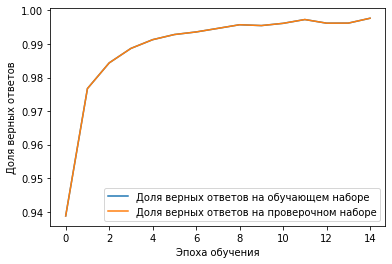

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

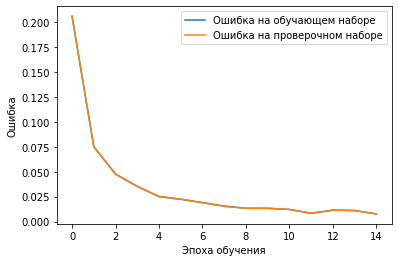

In [ ]:
# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# 2. Легко

In [ ]:
x_train = x_train[:5000]
print("Тренировочная выборка:", x_train.shape)

## Распознавание рукописных цифр MNIST

## Подготовка данных



In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

In [ ]:
x_test_org.shape

(10000, 28, 28)

In [ ]:
x_train_org.shape

(60000, 28, 28)

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

### Создание нейронной сети



In [ ]:
# Функция пересоздаёт пустую сеть
def createModel():

  # Создаем сеть
  model = Sequential()

  # Добавляем слои
  model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией  #dim - сколько признаков идет на вход
  model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
  model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

  # Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model # Возвращаем созданную сеть

In [ ]:
# Функция пересоздаёт пустую сеть
def createModelDrop():

  # Создаем сеть
  model = Sequential()

  # Добавляем слои
  model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией  #dim - сколько признаков идет на вход
  model.add(Dropout(0.3, input_shape=(60,)))
  model.add(Dense(400, input_dim=784, activation="relu"))
  model.add(BatchNormalization(input_shape=(60, )))
  model.add(Dropout(0.3))
  model.add(Dense(200, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

  # Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model # Возвращаем созданную сеть

## Обучение нейронной сети



In [ ]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model = createModel()
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 7s 14ms/step - loss: 0.2068 - accuracy: 0.9388
Epoch 2/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0756 - accuracy: 0.9772
Epoch 3/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0472 - accuracy: 0.9844
Epoch 4/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0335 - accuracy: 0.9892
Epoch 5/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0266 - accuracy: 0.9916
Epoch 6/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 7/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0184 - accuracy: 0.9934
Epoch 8/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0165 - accuracy: 0.9943
Epoch 9/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0125 - accuracy: 0.9958
Epoch 10/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0138 - accura

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


## На проверочных данных

In [ ]:
# Создаём пустую сеть


# Обучаем сеть
history = model.fit(x_train, 
          y_train,
          batch_size=128, 
          epochs=15,
          validation_split=0.2, # Указываем 20% случайных примеров для проверочной выборки
          verbose=1)

Epoch 1/15
375/375 [==============================] - 6s 16ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0093 - val_accuracy: 0.9961
Epoch 2/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0048 - val_accuracy: 0.9982
Epoch 3/15
375/375 [==============================] - 6s 16ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0082 - val_accuracy: 0.9973
Epoch 4/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0250 - val_accuracy: 0.9937
Epoch 5/15
375/375 [==============================] - 6s 16ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0182 - val_accuracy: 0.9942
Epoch 6/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0104 - val_accuracy: 0.9958
Epoch 7/15
375/375 [==============================] - 6s 16ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0323 - val_accuracy: 0.9912

## Проверка на тестовых данных 

In [ ]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("test_loss", test_loss)
print("test_acc", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9827
test_loss 0.10374472290277481
test_acc 0.982699990272522


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Визуализация

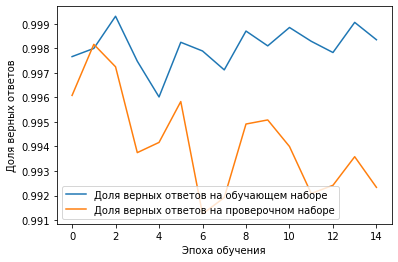

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

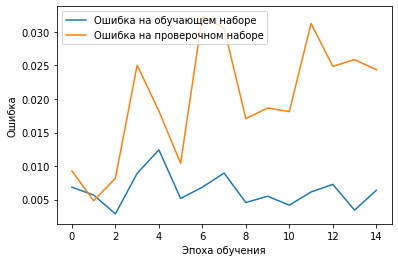

In [ ]:
# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# 3. Нормально

In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline


##Загрузка файла



In [ ]:
# Загружаем файлы
files.upload()
!ls # Выводим содержимое корневой папки

Saving sonar.csv to sonar (2).csv
 sample_data  'sonar (1).csv'  'sonar (2).csv'	 sonar.csv


## Загрузка данных

In [ ]:
# Загружаем данные из файла sonar.csv
df = pd.read_csv("sonar.csv", header=None)   # header=None, когда данные не имеют строки с заголовками
df.head()                                    # Выводим первые 5 строк наших данных

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
print(df.shape) # Размерность данных

(208, 61)


In [ ]:
dataset = df.values                 # Берем только значения массива(без индексов)
X = dataset[:,0:60].astype(float)   # Присваиваем им тип данных - float(с плавающей точкой) данным с 0 по 60 колонки
Y = dataset[:,60]                   # Присваеваем значению Y данные из столбца с индексом 60
Y[Y=='R']='0'                       # Если значение элемента столбца равно 'R', присваеваем ему значение '0'
Y[Y=='M']='1'                       # Если значение элемента столбца равно 'Y', присваеваем ему значение '1'
Y = Y.astype(int)                   # Меняем тип данных столбца на 'int'(целочисленный тип данных)
print(X.shape)                      # Выводим размерность X
print(Y.shape)                      # Выводим размерность Y
print(Y)                            

(208, 60)
(208,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Создание обучающей, проверочной и тестовой выборки



In [ ]:
# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split


# test_size=0.2 - будет выделено 20% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(166, 60)
(42, 60)
(166,)
(42,)


## Создание нейронной сети



In [ ]:
def createModelDrop():
  # Создаем сеть
  model = Sequential()

  model.add(Dense(60, input_dim=60, activation='linear'))
  model.add(BatchNormalization()) # добавляем слой BatchNormalization
  model.add(Dropout(0.2)) # добавляем слой Dropout
  model.add(Dense(30, activation='relu'))
  model.add(BatchNormalization()) # добавляем слой BatchNormalization
  model.add(Dropout(0.2)) # добавляем слой Dropout
  model.add(Dense(1, activation='sigmoid'))

# Компилируем сеть
# lr=0.001 - размер шага обучения
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
  return model # Возвращаем созданную сеть

In [ ]:
model = createModelDrop()

# Обучаем сеть
model.fit(x_train,         
          y_train,         
          batch_size=16,    # Размер батча
          epochs=200,      # Количество эпох
          verbose=1)       # Выводить процесс обучения на каждой эпохе

Epoch 1/200
11/11 [==============================] - 3s 5ms/step - loss: 0.9533 - accuracy: 0.4458
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.7484 - accuracy: 0.6145
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.5755 - accuracy: 0.7229
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 0.5414 - accuracy: 0.7229
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.4942 - accuracy: 0.7530
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4938 - accuracy: 0.7590
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.7651
Epoch 8/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4090 - accuracy: 0.8193
Epoch 9/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3650 - accuracy: 0.8253
Epoch 10/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3621 - accuracy: 0.8373
Epoch 11/

## ТЕСТ

In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

2/2 [==============================] - 0s 8ms/step - loss: 0.4746 - accuracy: 0.9048
[0.4745807647705078, 0.9047619104385376]
Доля верных ответов на тестовых данных, в процентах: 90.4762%


# 4. Сложно

## Предсказание цен машин с Юлы



In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
# Загружаем файлы
files.upload()
!ls # Выводим содержимое корневой папки

cars_new.csv  sample_data


In [ ]:
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5] # Выводим первые 5 машин 

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [ ]:
print(cars.values.shape)

(70119, 10)


In [ ]:
# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [ ]:
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

<ipython-input-10-006031011196>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prices = np.array(cars['price'], dtype=np.float)


In [ ]:
print(marks_dict)

{'honda': 0, 'opel': 1, 'suzuki': 2, 'chevrolet': 3, 'ford': 4, 'bmw': 5, 'audi': 6, 'subaru': 7, 'skoda': 8, 'mercedes-benz': 9, 'mazda': 10, 'toyota': 11, 'nissan': 12, 'renault': 13, 'kia': 14, 'peugeot': 15, 'daewoo': 16, 'chery': 17, 'volkswagen': 18, 'hyundai': 19, 'mitsubishi': 20}


In [ ]:
years.mean()

7.129646144783743e-15

In [ ]:
years.std()

1.0

In [ ]:
print(powers)

[ 0.22905575 -0.95630346 -0.87163494 ...  0.22905575 -0.75309902
  2.34576862]


In [ ]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

<ipython-input-15-d75b95df0e5f>:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = np.array(x_train, dtype=np.float)
<ipython-input-15-d75b95df0e5f>:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array(y_train, dtype=np.float)


In [ ]:
# Выводим размеры выборок
print(x_train.shape)
print(y_train.shape)

(70119, 3208)
(70119,)


In [ ]:
# Выводим один x_train
print(x_train[0,:20])
print(x_train[0,-20:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[ 1.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          1.          0.          0.          1.5200145  -1.40018212
  0.12288486  0.22905575]


In [ ]:
# Выводим y_train
print(y_train[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]


In [ ]:
# Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

# y_train.reshape(-1,1) добавляет одну размерность
# Это нужно потому, что y_scaler.fit_transform
# Требует двумерны вектор, массив примеров, которые надо нормализовать
# Он не умеет работать с одним примеров
# Поэтому мы делаем массив из одного примера
# На выходе он так же выдаёт массив примеров
# Но нам нужен только первый пример
# Поэтому мы делаем flatten() - уменьшение размерности

In [ ]:
y_train_scaled.shape

(70119,)

In [ ]:
# Выводим базовый и нормированный y_train
print(y_train[:10])
print(y_train_scaled[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]
[ 0.75082432 -0.62135434  0.3563911   0.70913625 -0.51745486  0.73318706
  0.09824578 -0.04445567  1.27032173 -0.4132347 ]


## Обучающая и тестовая выборка

In [ ]:
# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split


# test_size=0.2 - будет выделено 20% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train, x_test, y_train, y_test = train_test_split(y_train_scaled, x_train, test_size=0.2, shuffle=True)    
print ("дата для обучения:", x_train.shape,"лейблы для обучения: ", y_train.shape, "дата для теста:", x_test.shape, "лейблы для теста:", y_test.shape, sep="\n")
y_test.shape

дата для обучения:
(56095,)
лейблы для обучения: 
(56095, 3208)
дата для теста:
(14024,)
лейблы для теста:
(14024, 3208)


(14024, 3208)

In [ ]:
def createModel():
  model = Sequential()
  model.add(Dense(300, activation = 'relu', input_shape = x_train.shape[1:]))
  
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(1))
  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_train

array([[-0.04445567],
       [ 0.19140257],
       [-0.04445567],
       ...,
       [-0.6858105 ],
       [-0.42926857],
       [-0.74192905]])

In [ ]:
x_test = x_test.reshape(x_test.shape[0],-1)
x_test

array([[-0.49340406],
       [-0.1647097 ],
       [-0.48538712],
       ...,
       [-0.21281132],
       [-0.28656712],
       [ 0.36440803]])

In [ ]:
def createModelDrop():

  model = Sequential()
  model.add(Dense(300, activation = 'relu', input_shape = x_train.shape[1:]))
  model.add(Dropout(0.2)) # добавляем слой Dropout
  model.add(Dense(100, activation = 'relu'))
  model.add(Dropout(0.2)) # добавляем слой Dropout
  model.add(Dense(1))
  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

In [ ]:
# training
model = createModelDrop()
model.fit(x_train, y_train, epochs =20, batch_size = 32, validation_split = 0.2)

Epoch 1/20
1403/1403 [==============================] - 8s 5ms/step - loss: 0.0036 - mae: 0.0078 - val_loss: 0.0028 - val_mae: 0.0039
Epoch 2/20
1403/1403 [==============================] - 8s 6ms/step - loss: 0.0028 - mae: 0.0041 - val_loss: 0.0028 - val_mae: 0.0040
Epoch 3/20
1403/1403 [==============================] - 7s 5ms/step - loss: 0.0028 - mae: 0.0040 - val_loss: 0.0028 - val_mae: 0.0040
Epoch 4/20
1403/1403 [==============================] - 8s 6ms/step - loss: 0.0028 - mae: 0.0040 - val_loss: 0.0028 - val_mae: 0.0040
Epoch 5/20
1403/1403 [==============================] - 6s 5ms/step - loss: 0.0028 - mae: 0.0040 - val_loss: 0.0028 - val_mae: 0.0039
Epoch 6/20
1403/1403 [==============================] - 7s 5ms/step - loss: 0.0028 - mae: 0.0040 - val_loss: 0.0028 - val_mae: 0.0042
Epoch 7/20
1403/1403 [==============================] - 7s 5ms/step - loss: 0.0028 - mae: 0.0040 - val_loss: 0.0028 - val_mae: 0.0039
Epoch 8/20
1403/1403 [==============================] - 7s 5ms

## ТЕСТ

In [ ]:
predict = model.predict(x_test) 

439/439 [==============================] - 1s 2ms/step


In [ ]:
history = test_loss, test_acc=model.evaluate(x_test, y_test)

439/439 [==============================] - 2s 5ms/step - loss: 0.0028 - mae: 0.0044


In [ ]:
history # тут показывается mae, но не уверен что это нужно

[0.002800979884341359, 0.004376718308776617]

In [ ]:
predict_inverse = y_scaler.inverse_transform(predict).flatten()
print(predict_inverse.shape)
y_test.shape

(14024,)


(14024, 3208)

In [ ]:
predict_inverse

array([528806.94, 528942.44, 528812.06, ..., 528926.4 , 528900.9 ,
       529170.8 ], dtype=float32)

In [ ]:
y_test= y_scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
y_test

array([ 527726.10142757,  527726.10142757, 1151405.81816743, ...,
        109947.67002734,  604366.89708649,  881807.66726893])

In [ ]:
predict_inverse = predict_inverse.astype(np.float64)
predict_inverse

array([528806.9375, 528942.4375, 528812.0625, ..., 528926.375 ,
       528900.875 , 529170.8125])

In [ ]:
y_test = y_test[:predict_inverse.shape[0]]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predict_inverse)
mse = mean_squared_error(y_test, predict_inverse)

print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))

MAE: 2647.60
MSE: 923026009.53


In [ ]:
y_test.shape

(44988992,)

In [ ]:
predict_inverse.shape

(14024,)